In [1]:
from heap import Heap
from graphe import Graph
import numpy as np

In [2]:
M = np.array([[np.inf, 3, 8, np.inf, 4],
              [np.inf, np.inf, np.inf, 1, 7],
              [np.inf, 4, np.inf, np.inf, np.inf],
              [2, np.inf, 5, np.inf, np.inf],
              [np.inf, np.inf, np.inf, 6, np.inf]])

G = Graph(oriented=True, valued=True)
G.load_from_matrix(M)
H = Heap(type='min')
np.set_printoptions(precision=2)
origin = 0

In [3]:
# Initialise the distances and predecessors arrays
d, pi = G._init_dijkstra(origin)

# Initialise the 'min' heap
tas = zip(G.vertices_, d)
H.init_heap(tas)
H.show()

The Heap :
|-- Values : [0, 1, 2, 3, 4]
|-- Priorities : [np.float64(0.0), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf)]
_________


In [4]:
verbose = True
while not H.is_empty():
    curr_vertex, curr_priority = H.dequeue()
    succ_curr_vertex = G.next(curr_vertex)
    if verbose:
        print(f"current vertex :\n{curr_vertex} -> {succ_curr_vertex}")
    for vertex in succ_curr_vertex:
        if d[vertex] > d[curr_vertex] + G.weight(curr_vertex, vertex):
            d[vertex] = d[curr_vertex] + G.weight(curr_vertex, vertex)
            pi[vertex] = curr_vertex
            # Update the heap associated
            H.update_priority(vertex, d[vertex])
            if verbose:
                H.show()

current vertex :
0 -> [1 2 4]
The Heap :
|-- Values : [np.int64(1), 4, 2, 3]
|-- Priorities : [np.float64(3.0), np.float64(inf), np.float64(inf), np.float64(inf)]
_________
The Heap :
|-- Values : [np.int64(1), 4, np.int64(2), 3]
|-- Priorities : [np.float64(3.0), np.float64(inf), np.float64(8.0), np.float64(inf)]
_________
The Heap :
|-- Values : [np.int64(1), np.int64(4), np.int64(2), 3]
|-- Priorities : [np.float64(3.0), np.float64(4.0), np.float64(8.0), np.float64(inf)]
_________
current vertex :
1 -> [3 4]
The Heap :
|-- Values : [np.int64(4), np.int64(3), np.int64(2)]
|-- Priorities : [np.float64(4.0), np.float64(4.0), np.float64(8.0)]
_________
current vertex :
4 -> [3]
current vertex :
3 -> [0 2]
current vertex :
2 -> [1]


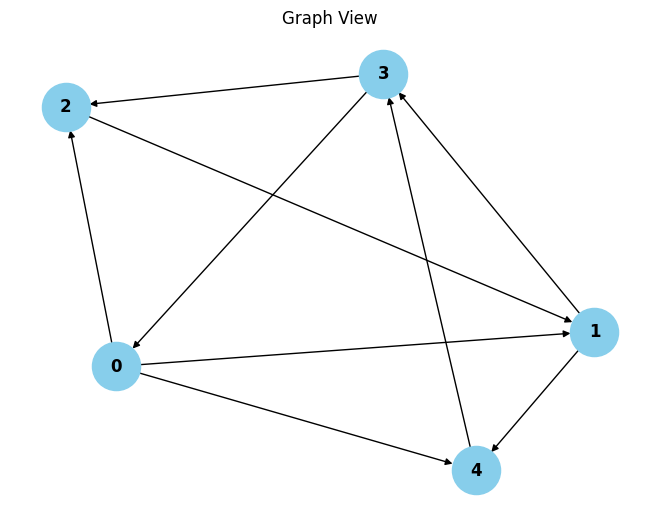

The minimal distances from the node 0:
[0. 3. 8. 4. 4.]
_________
The predecessors in the shortest path from the node 0:
[-1  0  0  1  0]
_________
The shortest path from the node 0 to 3:
0 -> 1 -> 3


In [5]:
G.plot_graph()
print(f"The minimal distances from the node {origin}:\n{d}")
print("_________")
print(f"The predecessors in the shortest path from the node {origin}:\n{pi}")
print("_________")

dest = 3
shortest_path = G.shortest_path_from_origin(pi, dest, origin)
print(f"The shortest path from the node {origin} to {dest}:")
if shortest_path:
    print(" -> ".join(map(str, shortest_path)))
else:
    print(f"No path from {origin} to {dest}")